In [93]:
import sys
import time
import numpy as np
import pandas as pd
import utils.samplefiles

import matplotlib
import matplotlib.pyplot as plt

In [94]:
# Start the stopwatch
script_start_time = time.time()

In [95]:
hdf_file_path = './output/data1.1.hdf'
plot_path = './img/data1.1.png'
# which sample is used to shown
sample_id = 249

In [96]:
data = utils.samplefiles.SampleFile()
data.read_hdf(hdf_file_path)

In [97]:
# when split_injections_noise is set to be True, GWs contain signals and pure waves are splited
df, noise = data.as_dataframe(injection_parameters=True, 
                  static_arguments=True, 
                  command_line_arguments=False, 
                  split_injections_noise=True)

In [98]:
print(df.columns)

Index([                  u'approximant',                u'bandpass_lower',
                      u'bandpass_upper',                     u'coa_phase',
                                 u'dec',                       u'delta_f',
                             u'delta_t',                      u'distance',
                              u'domain',                    u'event_time',
                             u'f_lower',                     u'fd_length',
                    u'h1_output_signal',                     u'h1_signal',
                              u'h1_snr',                     u'h1_strain',
                         u'inclination',                 u'injection_snr',
                    u'l1_output_signal',                     u'l1_signal',
                              u'l1_snr',                     u'l1_strain',
                               u'mass1',                         u'mass2',
                u'noise_interval_width',        u'original_sampling_rate',
                        u

In [99]:
print(df.injection_snr[sample_id])

7.312118997956996


In [100]:
print(df.mass1[sample_id])
print(df.mass2[sample_id])
print(df.spin1z[sample_id])
print(df.spin2z[sample_id])
print(df.scale_factor[sample_id])

48.0487002779792
73.45304776751829
0.0
0.0
0.010820990282000302


In [101]:
print(df.coa_phase[sample_id])
print(df.inclination[sample_id])
print(df.ra[sample_id])
print(df.dec[sample_id])
print(df.polarization[sample_id])

0.0
0.0
0.0
0.0
0.0


In [102]:
sample = df.loc[sample_id]

In [103]:
# Read out and construct some necessary values for plotting
seconds_before_event = float(sample['seconds_before_event'])
seconds_after_event = float(sample['seconds_after_event'])
target_sampling_rate = float(sample['target_sampling_rate'])
sample_length = float(sample['sample_length'])
print(seconds_before_event)
print(target_sampling_rate)
print(sample_length)

0.5
4096.0
1.0


In [104]:
# Create a grid on which the sample can be plotted so that the
# event_time is at position 0
grid = np.linspace(0 - seconds_before_event, 0 + seconds_after_event, int(target_sampling_rate * sample_length))

# for time from -0.15s to 0.05s
#grid = np.linspace(0 - seconds_before_event, 0 + seconds_after_event, int(target_sampling_rate * sample_length)+1)

In [105]:
det_name = 'H1'
det_string = 'h1_strain'

In [106]:
maximum = np.max(sample[det_string])
print(maximum)

167.45425


In [107]:
maximum = max(np.max(sample['h1_signal']), np.max(sample['l1_signal']))
print(maximum)

1.1015172360294991e-20


In [108]:
maximum = max(np.max(sample['h1_output_signal']), np.max(sample['l1_output_signal']))
print(maximum)

30.57667110709697


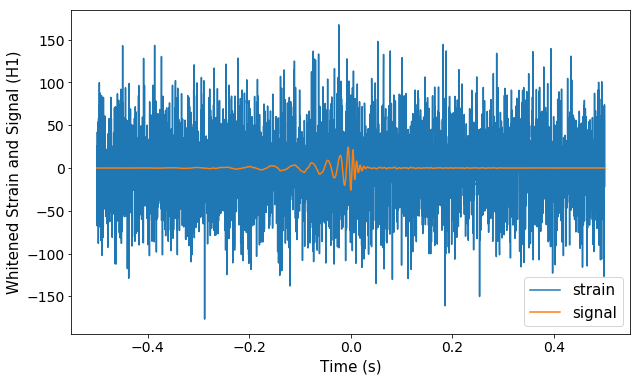

In [109]:
plt.plot(grid, sample[det_string], color='C0',label = 'strain')
plt.plot(grid, sample['h1_output_signal'], color='C1',label = 'signal')
#plt.xlim(-1.5, 0.5)
#plt.ylim(-150, 150)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Whitened Strain and Signal ({})'
                        .format(det_name), fontsize=15)
plt.xlabel('Time (s)', fontsize=15)
plt.legend(fontsize=15)

# Adjust the size and spacing of the subplots
plt.gcf().set_size_inches(9, 6, forward=True)
plt.tight_layout(rect=[0, 0, 1, 0.9])
plt.subplots_adjust(wspace=0, hspace=0)

# plt.show()
plt.savefig(plot_path)